# Chihuahua or Muffin
This notebook demonstrates how we can use Pytorch to work on an image classification problem 

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, models
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy

In [3]:
!python --version

Python 3.9.16


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

# prepare directory and files in colab

In [5]:

#%cd /content
#!git clone https://github.com/porrameth/teach_ai.git
#!ls
#%cd /content/teach_ai
#!ls

In [7]:
%pwd
#%cd CodeProj2/02_Learn/pytorch/
#!ls chihuahua_muffin/
!ls chihuahua_muffin_small2/


test  train
mytest train  val


# dataset and loader

In [8]:

# Define transformations for image preprocessing 
transform = transforms.Compose([
    transforms.Resize(255),  # Adjust size as needed  255 
    transforms.CenterCrop(224),  # Adjust size as needed 224
    transforms.RandomHorizontalFlip(), # just try
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
TRAIN ='chihuahua_muffin_small2/train'
VAL = 'chihuahua_muffin_small2/val'
TEST = 'chihuahua_muffin_small2/mytest'
# Create dataset
train_data = datasets.ImageFolder(root= TRAIN, transform=transform)
val_data = datasets.ImageFolder(root= VAL ,transform=transform)
test_data = datasets.ImageFolder(root= TEST  ,transform=transform)



In [9]:
#classes = train_data.classes
#classes
val_data.classes
val_data.class_to_idx

{'chihuahua': 0, 'muffin': 1}

In [10]:
val_data.samples[-10:]

[('chihuahua_muffin_small2/val/muffin/img_4_956.jpg', 1),
 ('chihuahua_muffin_small2/val/muffin/img_4_960.jpg', 1),
 ('chihuahua_muffin_small2/val/muffin/img_4_971.jpg', 1),
 ('chihuahua_muffin_small2/val/muffin/img_4_972.jpg', 1),
 ('chihuahua_muffin_small2/val/muffin/img_4_978.jpg', 1),
 ('chihuahua_muffin_small2/val/muffin/img_4_979.jpg', 1),
 ('chihuahua_muffin_small2/val/muffin/img_4_989.jpg', 1),
 ('chihuahua_muffin_small2/val/muffin/img_4_991.jpg', 1),
 ('chihuahua_muffin_small2/val/muffin/img_4_996.jpg', 1),
 ('chihuahua_muffin_small2/val/muffin/img_4_997.jpg', 1)]

In [27]:
batch_size = 128
train_dataloader = DataLoader(train_data, batch_size=batch_size,num_workers=4)
val_dataloader = DataLoader(val_data, batch_size=batch_size,num_workers=4)
test_dataloader = DataLoader(test_data, batch_size=batch_size,num_workers=4)


In [12]:
len(train_dataloader)
val_dataloader.dataset

Dataset ImageFolder
    Number of datapoints: 925
    Root location: chihuahua_muffin_small2/val
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [13]:
for X, y in val_dataloader:
    print(f' {X.shape}')
    print(f'shape of y {y.shape} {y.dtype} ')
    break

 torch.Size([128, 3, 224, 224])
shape of y torch.Size([128]) torch.int64 


torch.Size([3, 224, 224])


/var/folders/r7/46wyby7515198gwmqnzxr6l40000gn/T/ipykernel_73832/119720203.py:5: RuntimeWarning: invalid value encountered in cast
  plt.imshow((img.permute(1,2,0) * 255).numpy().astype('uint16'))


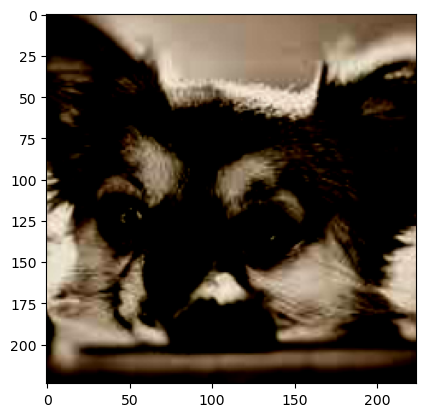

In [14]:
img, lab = train_data[1]
print(img.shape)
lab
## plot 3 channels image- need to permute channel to the last dimension
plt.imshow((img.permute(1,2,0) * 255).numpy().astype('uint16'))


size 798


/var/folders/r7/46wyby7515198gwmqnzxr6l40000gn/T/ipykernel_73832/1363368693.py:26: RuntimeWarning: invalid value encountered in cast
  img_permute = (img_permute*255).numpy().astype('uint16')


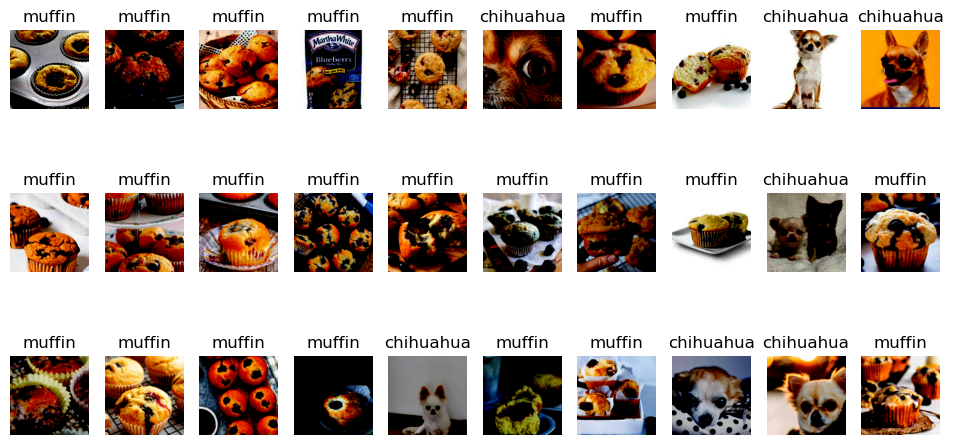

In [56]:
# print sample of data
#import warnings
#warnings.filterwarnings('ignore', message='not allowed')
import random
#img , label = train_data[0]
#print(img.shape, label)


labels = [
   "chihuahua","muffin"
]

row,col=3,10
fig, ax = plt.subplots(row,col,figsize=(12,6))
counter=0
size = len(train_data)
print(f'size {size}')
nums = random.sample(range(size),row*col)
#print(f'nums {nums}')
for r in range(row):
    for c in range(col):
        
        num  = nums[counter]
        img , lab = train_data[num]
        img_permute = img.permute(1,2,0)
        img_permute = (img_permute*255).numpy().astype('uint16')
        ax[r,c].imshow(img_permute)
        ax[r,c].set_axis_off()

        #title = "("+str(lab)+")"
        ax[r,c].set_title(labels[lab])
        counter+=1


# Model Architecture

we are using a technique called transfer-learning in order to increase accuracy and speed up the training time

In [16]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    #else "mps"
    #if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

#Pre-trained ResNet Model
model = models.resnet50(pretrained=True)

# Freeze Base Model Parameters
for param in model.parameters():
    param.requires_grad = False

# Replace Final Classifier Layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Binary classification
print(model)

Using cpu device


/Users/porrameth/miniconda3/envs/py39_conda-pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/porrameth/miniconda3/envs/py39_conda-pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [18]:
i = 0
for batch, (xx,yy) in enumerate(val_dataloader):
    print(batch, xx.shape,yy.shape)
    i+=1
    if i == 3:
        break

0 torch.Size([128, 3, 224, 224]) torch.Size([128])
1 torch.Size([128, 3, 224, 224]) torch.Size([128])
2 torch.Size([128, 3, 224, 224]) torch.Size([128])


In [19]:
## Method 2
#loss_fn = nn.BCEWithLogitsLoss()

learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


def train_one_epoch(epoch_index, tb_writer,training_loader):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        #labels= labels.unsqueeze(1).float() ## FOR BCELoss
        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 5 == 0:
            last_loss = running_loss / 5 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss



In [31]:
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 6

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # gradient is on
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer,train_dataloader)


    running_vloss = 0.0
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient computation 
    correct=0
    with torch.no_grad():
        for i, vdata in enumerate(val_dataloader):
            
            vinputs, vlabels = vdata
            # X, y = X.to(device), y.to(device)
            #vlabels = vlabels.unsqueeze(1).float() ## For BCELoss
            voutputs = model(vinputs)
            vloss = loss_fn(voutputs, vlabels)
            running_vloss += vloss
            #correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            correct += (voutputs.argmax(1) == vlabels).type(torch.float).sum().item()

    avg_vloss = running_vloss / (i + 1)
    print(f'--correct = {correct}, validation size ={len(val_dataloader.dataset)}')
    correct /= len(val_dataloader.dataset)
    print(f'LOSS train {avg_loss} valid {avg_vloss:>8f}  Val Accuracy {(100*correct):>0.4f}% ')
    #print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {avg_vloss:>8f} \n")


    #test(test_dataloader,model, loss_fn)
    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best loss, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:
  batch 1 loss: 0.1906656265258789
  batch 6 loss: 0.9151054501533509
--correct = 849.0, validation size =925
LOSS train 0.9151054501533509 valid 0.509671  Val Accuracy 91.7838% 
EPOCH 2:
  batch 1 loss: 0.1482503056526184
  batch 6 loss: 0.608489042520523
--correct = 505.0, validation size =925
LOSS train 0.608489042520523 valid 0.544828  Val Accuracy 54.5946% 
EPOCH 3:
  batch 1 loss: 0.2941435813903809
  batch 6 loss: 0.738327956199646
--correct = 671.0, validation size =925
LOSS train 0.738327956199646 valid 0.458577  Val Accuracy 72.5405% 
EPOCH 4:
  batch 1 loss: 0.2312800407409668
  batch 6 loss: 0.7627592444419861
--correct = 857.0, validation size =925
LOSS train 0.7627592444419861 valid 0.415623  Val Accuracy 92.6486% 
EPOCH 5:
  batch 1 loss: 0.18780184984207154
  batch 6 loss: 0.6669709920883179
--correct = 738.0, validation size =925
LOSS train 0.6669709920883179 valid 0.415343  Val Accuracy 79.7838% 
EPOCH 6:
  batch 1 loss: 0.23887104988098146
  batch 6 loss: 0.

In [32]:
#torch.save(model.state_dict(), "model_muffin_weights-resnet-medium.pth")
#torch.save(model.state_dict(), "model_muffin_weights-resnet-big.pth")
torch.save(model.state_dict(), "model_muffin_weights-resnet-small2.pth")


#torch.save(model.state_dict(), "model_muffin-s.pth")
print("Saved PyTorch Model State to model_muffin_weights-resnet.pth")

Saved PyTorch Model State to model_muffin_weights-resnet.pth


In [33]:
!ls

basic_mnist.ipynb                      model_20240814_225039_0
basic_mnist2.ipynb                     model_20240814_225039_1
chihuahua_muffin                       model_20240814_230633_0
chihuahua_muffin-0.2.ipynb             model_20240814_230633_1
chihuahua_muffin-resnet01.ipynb        model_20240814_230633_3
chihuahua_muffin-resnet01_simple.ipynb model_20240814_230633_5
chihuahua_muffin.ipynb                 model_20240814_230633_6
chihuahua_muffin_small                 model_20240814_230633_7
chihuahua_muffin_small2                model_20240814_230633_8
chihuahua_muffin_small2.zip            model_20240814_230633_9
data                                   model_20240815_220203_0
model1.pth                             model_20240815_220203_2
model_20240813_225810_3                model_20240815_222324_0
model_20240813_225810_5                model_20240815_222324_2
model_20240813_225810_6                model_20240815_222324_3
model_20240813_225810_7                model_20240815_2

#Load trained model and use it on test set

In [68]:
#model = Convo().to(device)
model1 = models.resnet50(pretrained=False)
num_ftrs = model1.fc.in_features
model1.fc = nn.Linear(num_ftrs, 2)
#model1.load_state_dict(torch.load("model_muffin_weights-resnet.pth"))
model1.load_state_dict(torch.load("model_muffin_weights-resnet-big.pth"))
#model1.load_state_dict(torch.load("model_muffin_weights-resnet-medium.pth"))
#model1.load_state_dict(torch.load("model_muffin_weights-resnet-small2.pth"))
model1.eval()

/Users/porrameth/miniconda3/envs/py39_conda-pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/porrameth/miniconda3/envs/py39_conda-pytorch/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [69]:
def sample_incorrect_images(dataset):
    row,col=2,5
    counter=0
    
    if len(dataset) >= row*col:
        nums = random.sample(range(len(dataset)),row*col)
        fig, ax = plt.subplots(row,col,figsize=(12,6))
        for r in range(row):
            for c in range(col):
                #print(f'counter = {counter}')
                num = nums[counter]
                img , lab, pred = dataset[num]
                img_permute = img.permute(1,2,0)
                img_permute = (img_permute*255).numpy().astype('uint16')
                ax[r,c].imshow(img_permute)
                ax[r,c].set_axis_off()

                #title = "("+str(lab)+")"
                ax[r,c].set_title(f'Pred:{labels[pred]}\nActual:{labels[lab]}')
                counter+=1
    else:
        print(f'Else: length of incorrect dataset = {len(dataset)}')
        fig, ax = plt.subplots(len(dataset),figsize=(15,8))
        for idx, data in enumerate(dataset):
            print(f'idx={idx}')
            img, lab, pred = data
            img_permute = img.permute(1,2,0)
            img_permute = (img_permute*255).numpy().astype('uint16')
            ax[idx].imshow(img_permute)
            ax[idx].set_axis_off()
                #title = "("+str(lab)+")"
            ax[idx].set_title(f'Pred:{labels[pred]}\nActual:{labels[lab]}')
            
        
        

def test_testset(model=model1, dataloader=test_dataloader):
    model.eval()
    test_loss = 0
    correct = 0
    incorrect_preds = []
    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            #target = target.unsqueeze(1).float() ## for BCELoss
            output = model(data)
            #output = output.unsqueeze(1).float()
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True) 
            # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            for idx in range(len(data)):
                if pred[idx] != target[idx]:
                    incorrect_preds.append((data[idx], target[idx], pred[idx]))
    #for img, lab, pred in incorrect_preds:
    #    plt.imshow(img.cpu().permute(1,2,0))
    #    plt.title(f'True:{lab}, Predicted:{pred}')
    #    plt.show
    
    
    test_loss /= len(dataloader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(dataloader.dataset),
        100. * correct / len(dataloader.dataset)))
    sample_incorrect_images(incorrect_preds)

In [70]:
#test_testset(model=model)


Test set: Average loss: 0.0040, Accuracy: 75/91 (82%)



/var/folders/r7/46wyby7515198gwmqnzxr6l40000gn/T/ipykernel_73832/3330974901.py:14: RuntimeWarning: invalid value encountered in cast
  img_permute = (img_permute*255).numpy().astype('uint16')


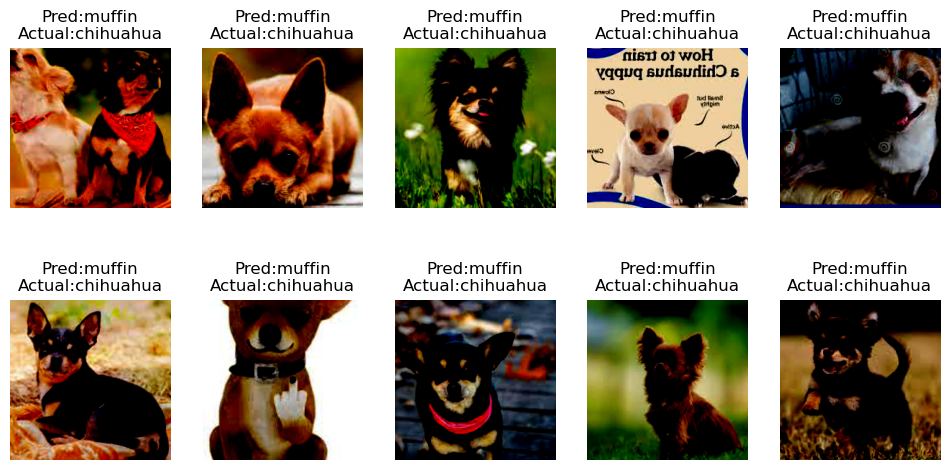

In [71]:
test_testset()

mytest test   train

Test set: Average loss: 0.0040, Accuracy: 74/91 (81%)

counter = 0
counter = 1
counter = 2
counter = 3
counter = 4
counter = 5
counter = 6
counter = 7
counter = 8
counter = 9


/var/folders/r7/46wyby7515198gwmqnzxr6l40000gn/T/ipykernel_95828/1449390548.py:12: RuntimeWarning: invalid value encountered in cast
  img_permute = (img_permute*255).numpy().astype('uint16')


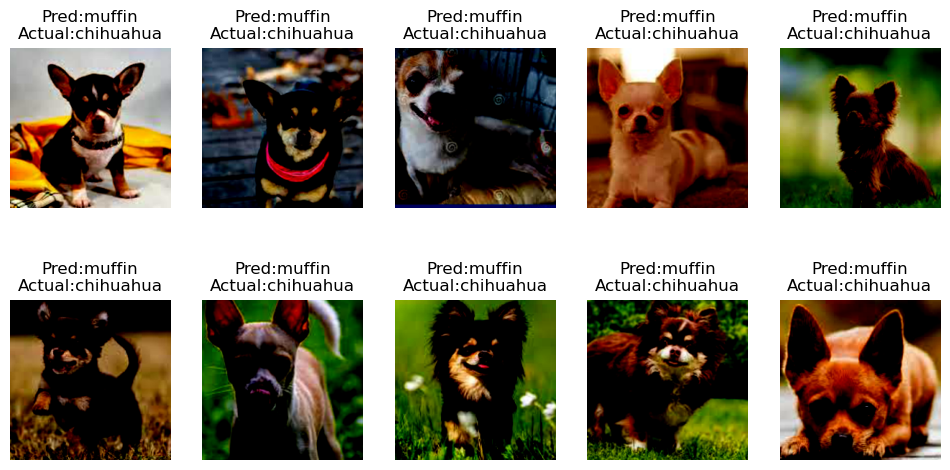

In [112]:
!ls chihuahua_muffin_small2/
MYDATA = 'chihuahua_muffin_small2/mytest'
my_data = datasets.ImageFolder(root= MYDATA ,transform=transform)
my_dataloader = DataLoader(my_data, batch_size=batch_size,num_workers=4)
test_testset(model=model,dataloader=my_dataloader)

In [60]:
test_data[0][0].shape

torch.Size([3, 224, 224])

In [61]:
test_data[0][1]

0